# BX Book dataset - Exploratory Analysis  
  
Source: The dataset is available [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/).

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

### Importing the datasets  
  
While the raw data is available at the source mentioned above, the cleaned data is available in this repo in the folder titled **_'clean-data'_**. We shall be using this data for further analysis.

In [2]:
books = pd.read_csv('clean-data/books.csv',index_col = 0)
ratings = pd.read_csv('clean-data/ratings.csv', index_col = 0)

/Users/janakajain/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
books.describe()

,Year-Of-Publication
count,271379.000000
mean,1959.756050
std,258.011363
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


As can be seen, the dataset contains books from years of the future. Let us look at the count of such books.

In [4]:
future_books = books[books['Year-Of-Publication'] > 2017].shape[0]

There are {{future_books}} such books

#### Let us look at the distribution of book counts over years  
  
As can be seen, the distribution is skewed to the right - there are more number of titles from the 

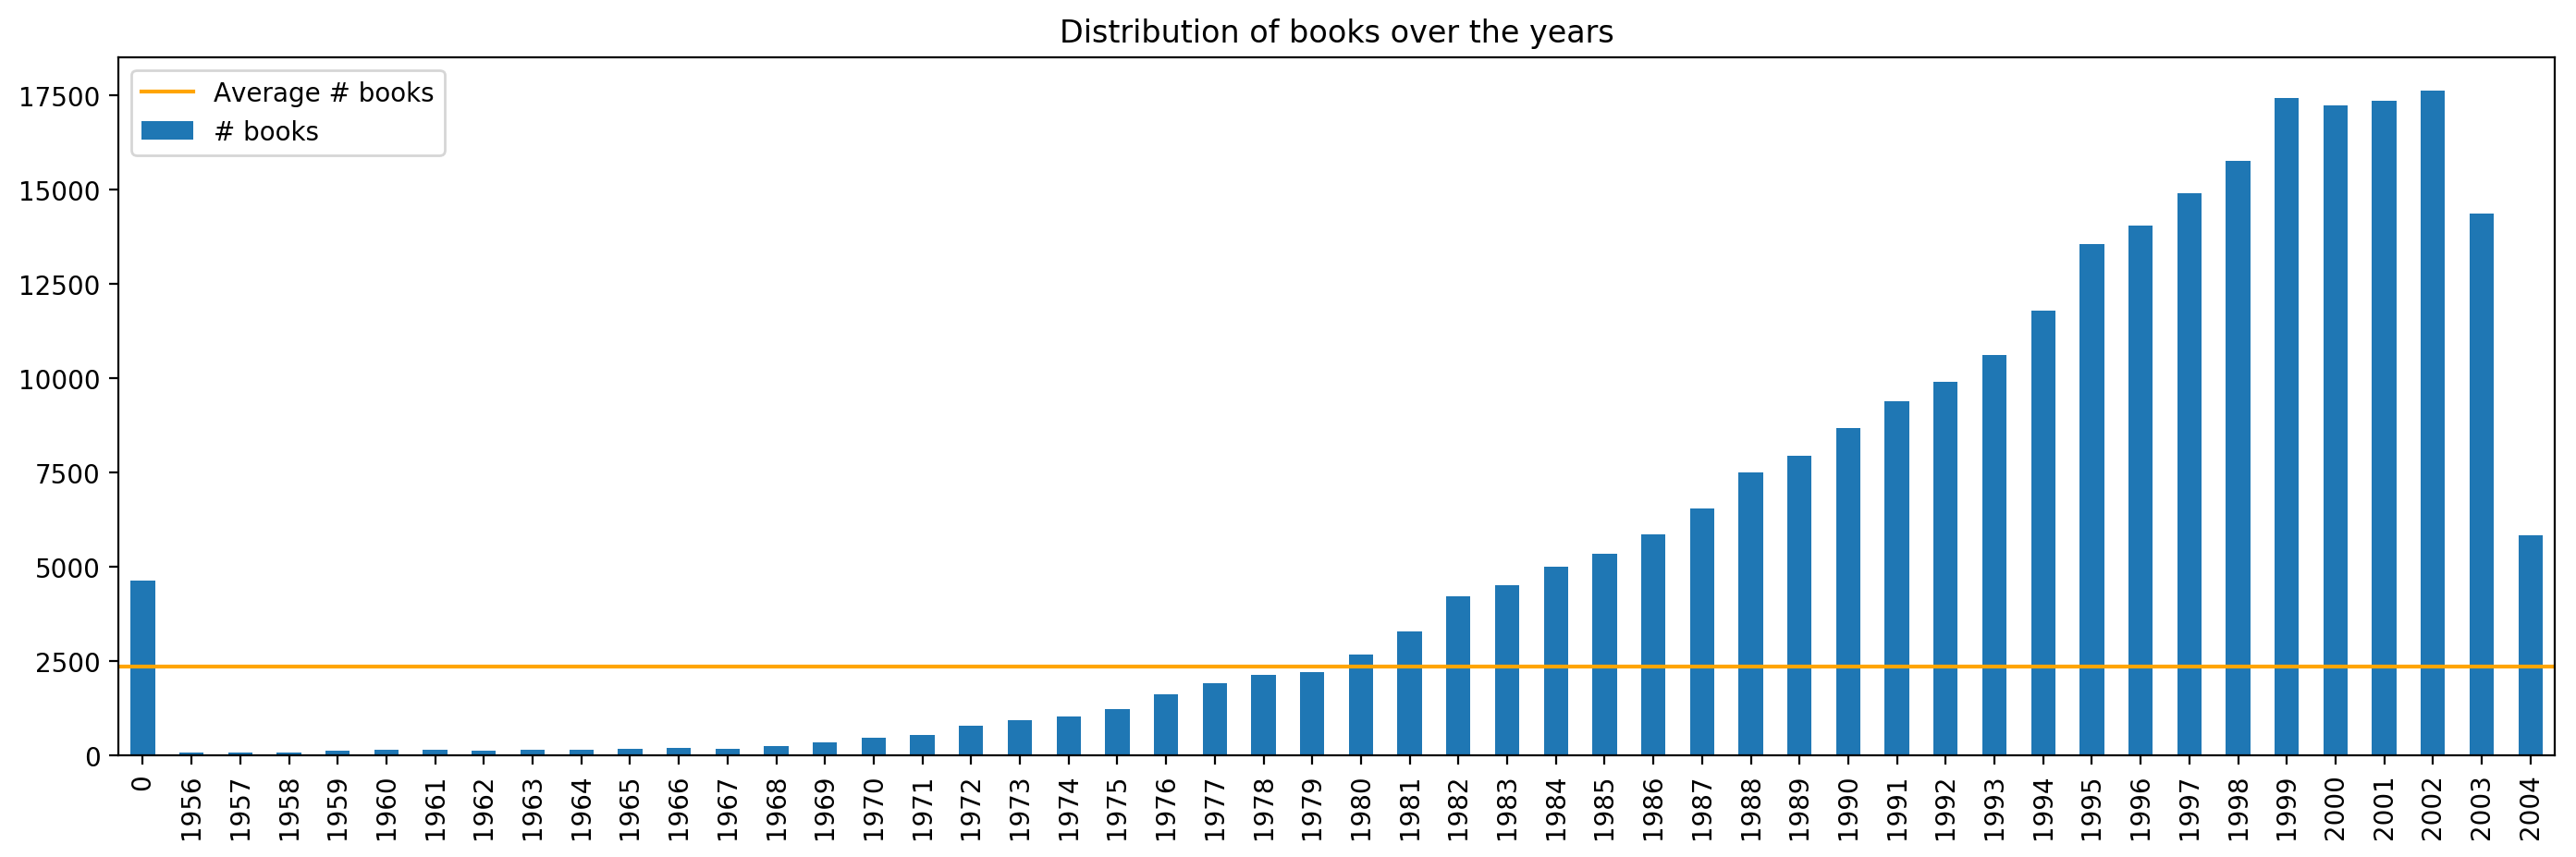

In [5]:
plt.rcParams['figure.figsize'] = (17,5)
books['Year-Of-Publication'].value_counts().head(50).sort_index().plot(kind='bar',label = '# books');
plt.axhline(books['Year-Of-Publication'].value_counts().mean(),label = 'Average # books', c='orange');
plt.legend();
plt.title('Distribution of books over the years');

A similar trend is observed for publishers whereby there is a skew observed towards top publishers. Publishing houses sometimes tend to publish a certain 'type' of content - in this sense, this feature can be an important factor in creating relevant recommendations.

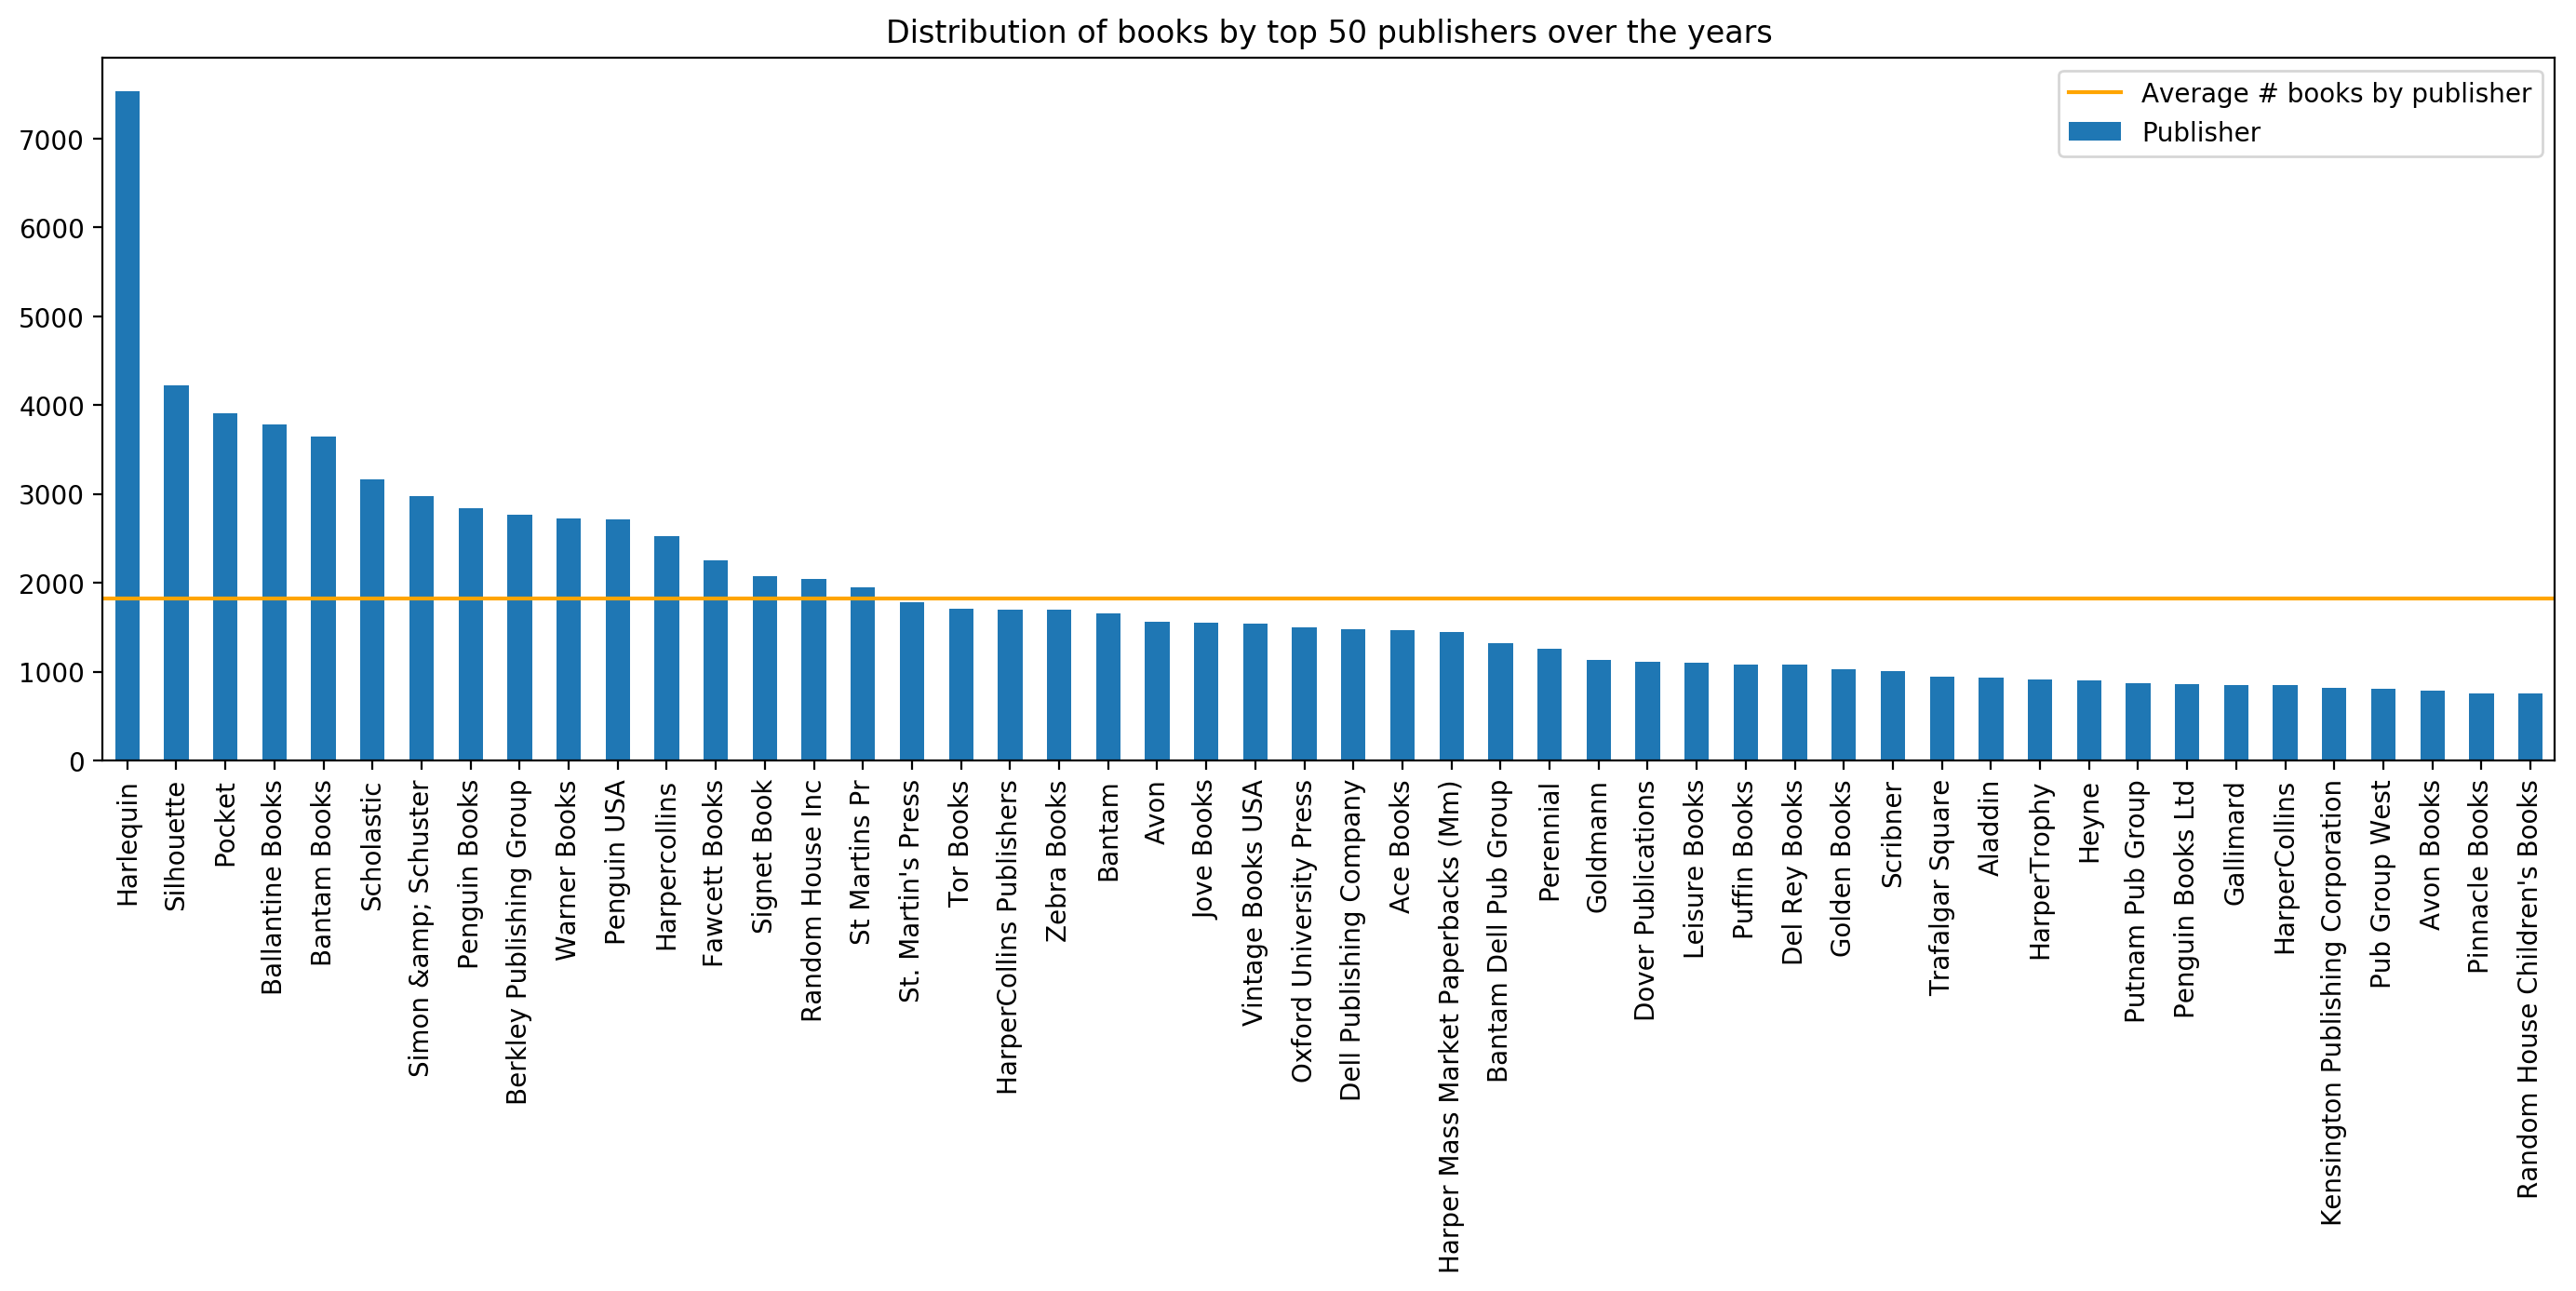

In [6]:
books['Publisher'].value_counts().head(50).plot(kind='bar');
plt.axhline(books['Publisher'].value_counts().head(50).mean(),label = 'Average # books by publisher', c='orange');
plt.legend();
plt.title('Distribution of books by top 50 publishers over the years');

In [7]:
books.head(4)

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,isbn,image-url-l
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0195153448,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0002005018,http://images.amazon.com/images/P/0002005018.0...
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0060973129,http://images.amazon.com/images/P/0060973129.0...
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0374157065,http://images.amazon.com/images/P/0374157065.0...


In [8]:
ratings = pd.read_csv('clean-data/ratings.csv')

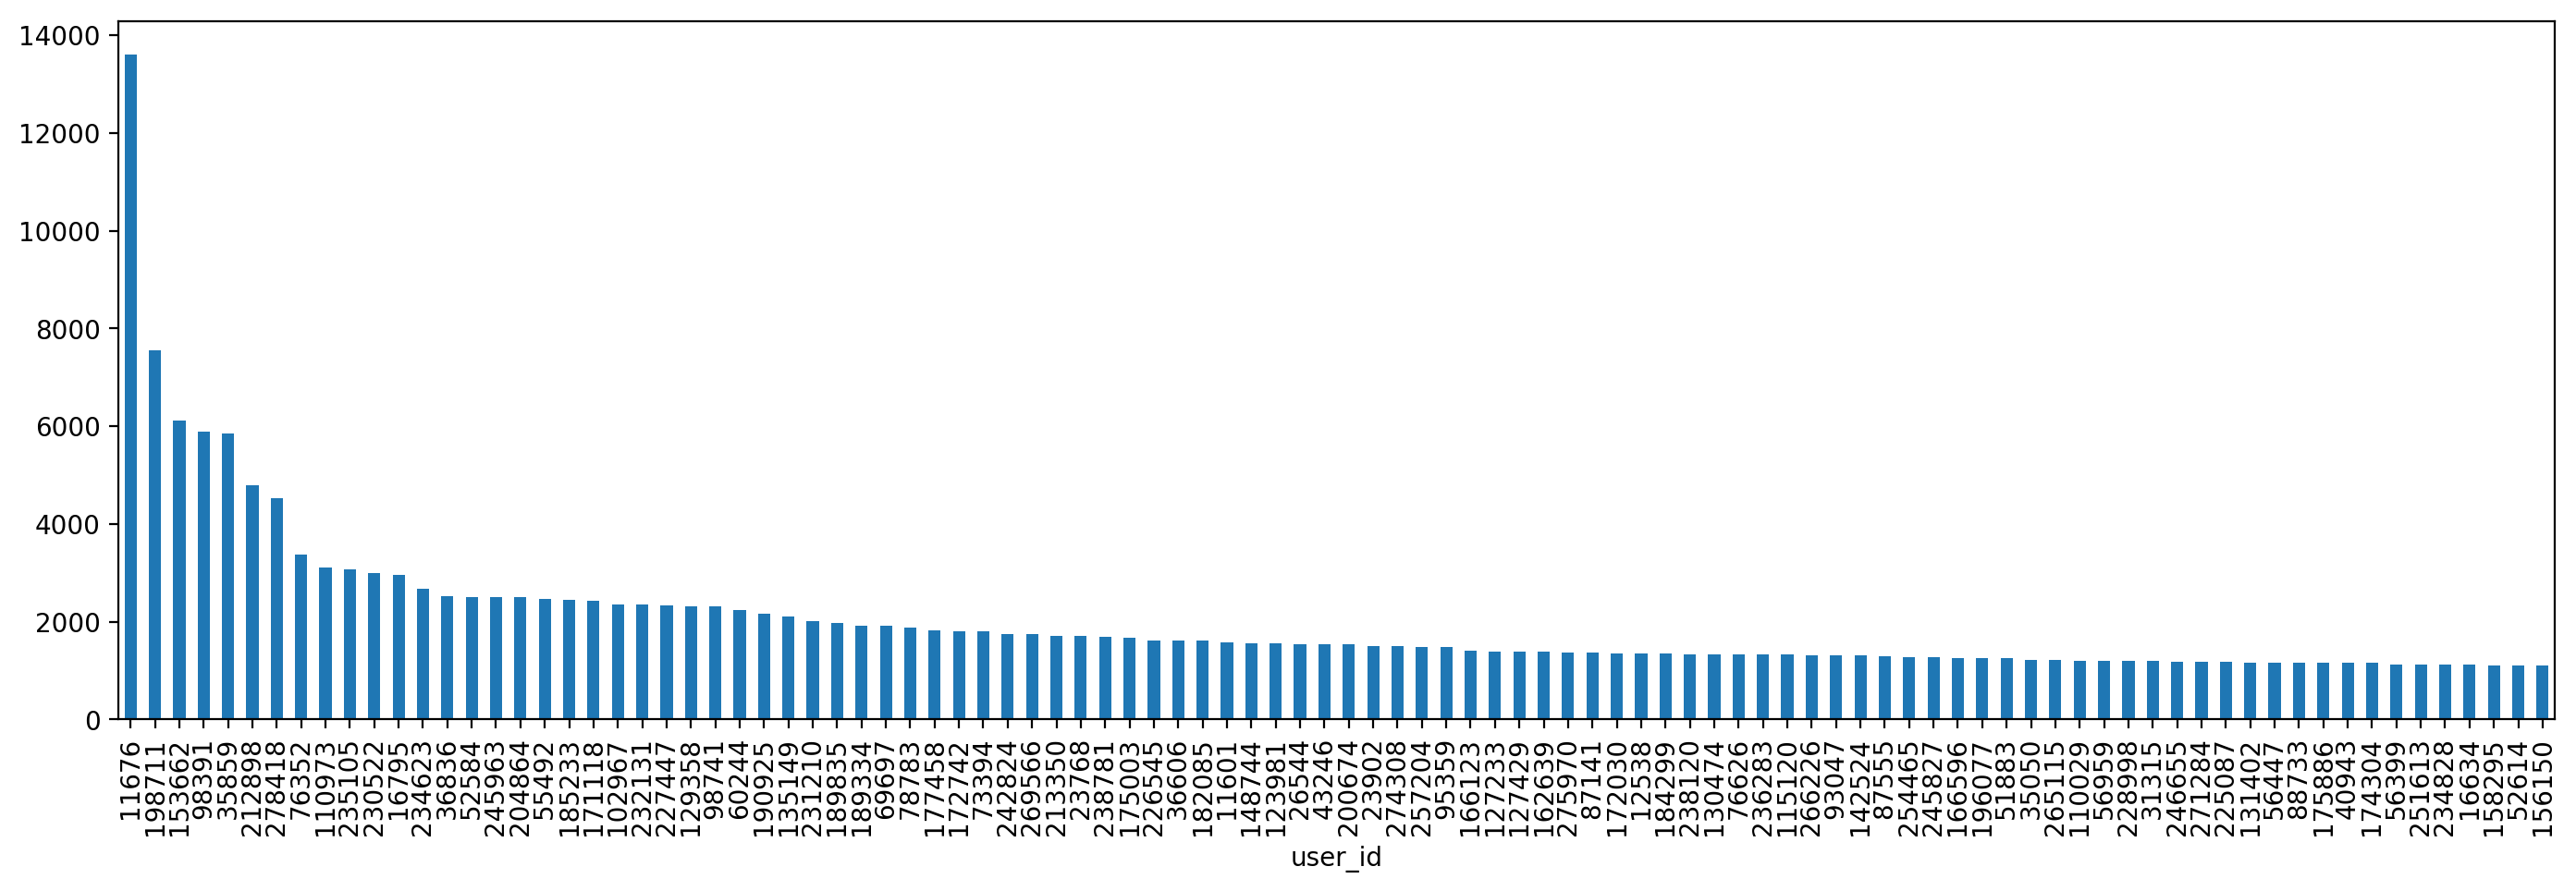

In [11]:
ratings.groupby('user_id').count()['book_rating'].sort_values(ascending=False).head(100).plot(kind='bar');

In [80]:
agg = {
    'book_rating': ['count','sum','mean']
}

In [81]:
users = ratings.groupby('user_id').agg(agg)['book_rating']

In [82]:
users.describe()

,count,sum,mean
count,105283.000000,105283.000000,105283.000000
mean,10.920851,31.309537,4.394235
std,90.562825,295.688283,3.411761
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,8.000000,4.600000
75%,4.000000,16.000000,7.500000
max,13602.000000,62092.000000,10.000000


In [83]:
users['label'] = pd.cut(users['count'],bins=[0,1,4,10,14000],labels=['rare','casual','avid','involved'])

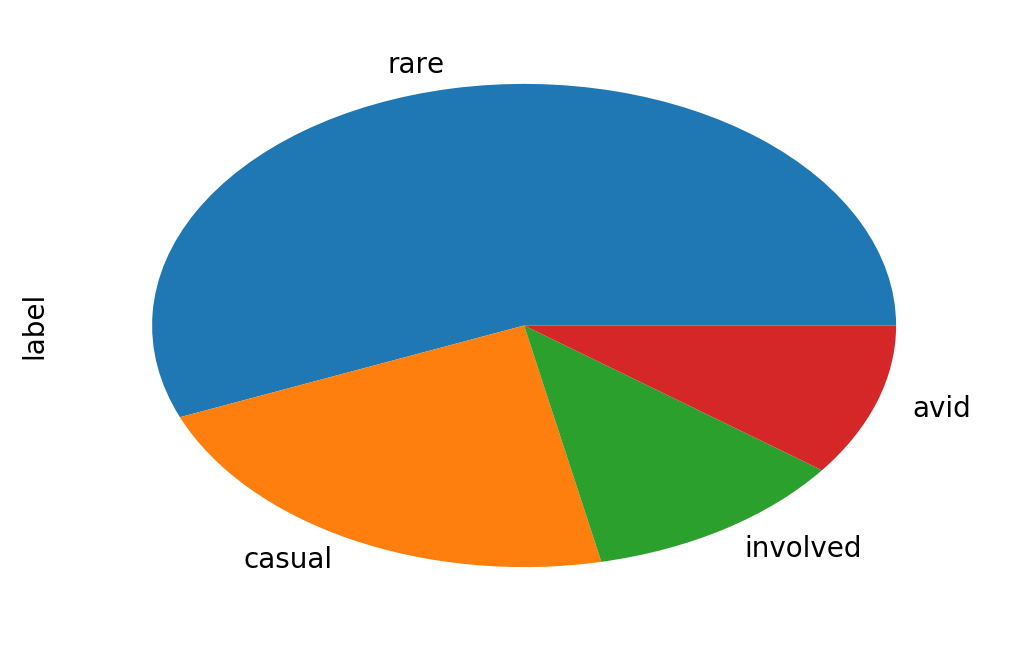

In [84]:
users['label'].value_counts(normalize = True).plot(kind='pie');

In [104]:
a = [1,3,4,5,6,7,10]

In [105]:
a.remove(10)

In [106]:
a

[1, 3, 4, 5, 6, 7]